<a href="https://colab.research.google.com/github/rezaDamansabz/Customer_Churn_Analysis_ML/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CUSTOMER CHURN PREDICTION
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. Therefore, detecting the churn is essential, as attracting a new customer costs five times as much as keeping an existing one.
Here, I have deployed machine learning to detect early signs of petential churn. By addressing this, the business may not only preserve its market, but also grow and thrive.

###Step 1: Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import metrics


### Step 2: Loading the dataset and getting familiarized with the data

In [ ]:
# 1. Install Kaggle API
!pip install kaggle

# 2. Upload your kaggle.json (get it from Kaggle → Account → API → Create New Token)
from google.colab import files
files.upload()  # Upload kaggle.json

# 3. Download Telco dataset
!kaggle datasets download -d blastchar/telco-customer-churn

# 4. Extract and load
!unzip telco-customer-churn.zip
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open telco-customer-churn.zip, telco-customer-churn.zip.zip or telco-customer-churn.zip.ZIP.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Step 3: Data manipulation and processing

We see that Total Charges column is object, while it is numeric. Let's fix this

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now the total charge is numbers. Let's check the missing values in this column

In [ ]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The tenure for these entries are also 0. Let's check to see if there are other 0 tenures

In [ ]:
# Check the 0 tenure
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Since they are the same entries, let's drop them from the dataset. It's only 11 entries, so it won't affect the data.

In [ ]:
# Mapping the column to change from 1,0 to Yes, No
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop(labels=df[df['tenure']==0].index, axis=0, inplace=True)
df[df['tenure']==0].index

Index([], dtype='int64')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
numericalColumns = df.select_dtypes(include=['int','float'])
numericalColumns.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
#Examine the distributions for categorical columns (columns with object data type)
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
obj = df.dtypes =='object'
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
for col in cat_cols:
  print(f"\nColumn: {col}")
  print(df[col].value_counts(dropna=False))


Column: gender
gender
Male      3549
Female    3483
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

Column: Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

Column: DeviceProtection
DevicePr

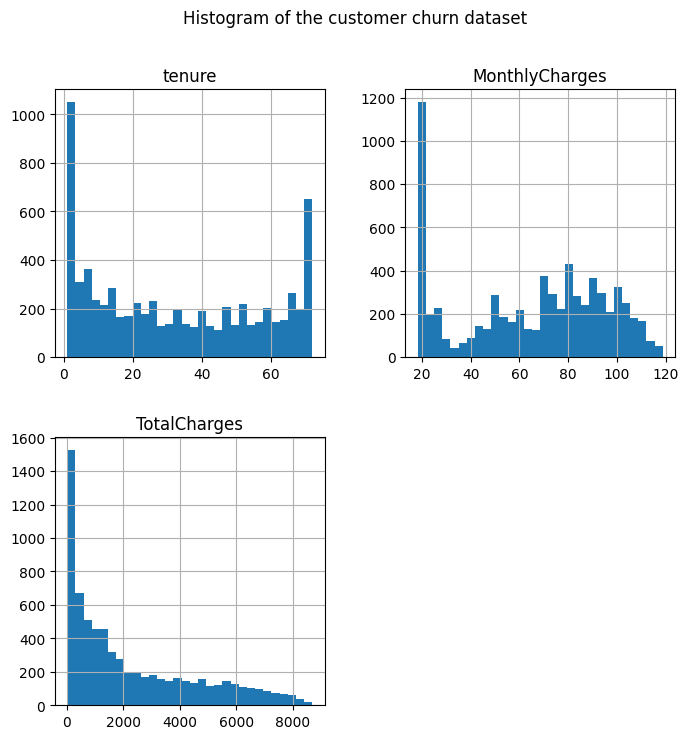

In [ ]:
# Examine the distribution of variables (only for numerical features)
df.hist(figsize=(8,8), bins=30)
plt.suptitle("Histogram of the customer churn dataset")
plt.show()

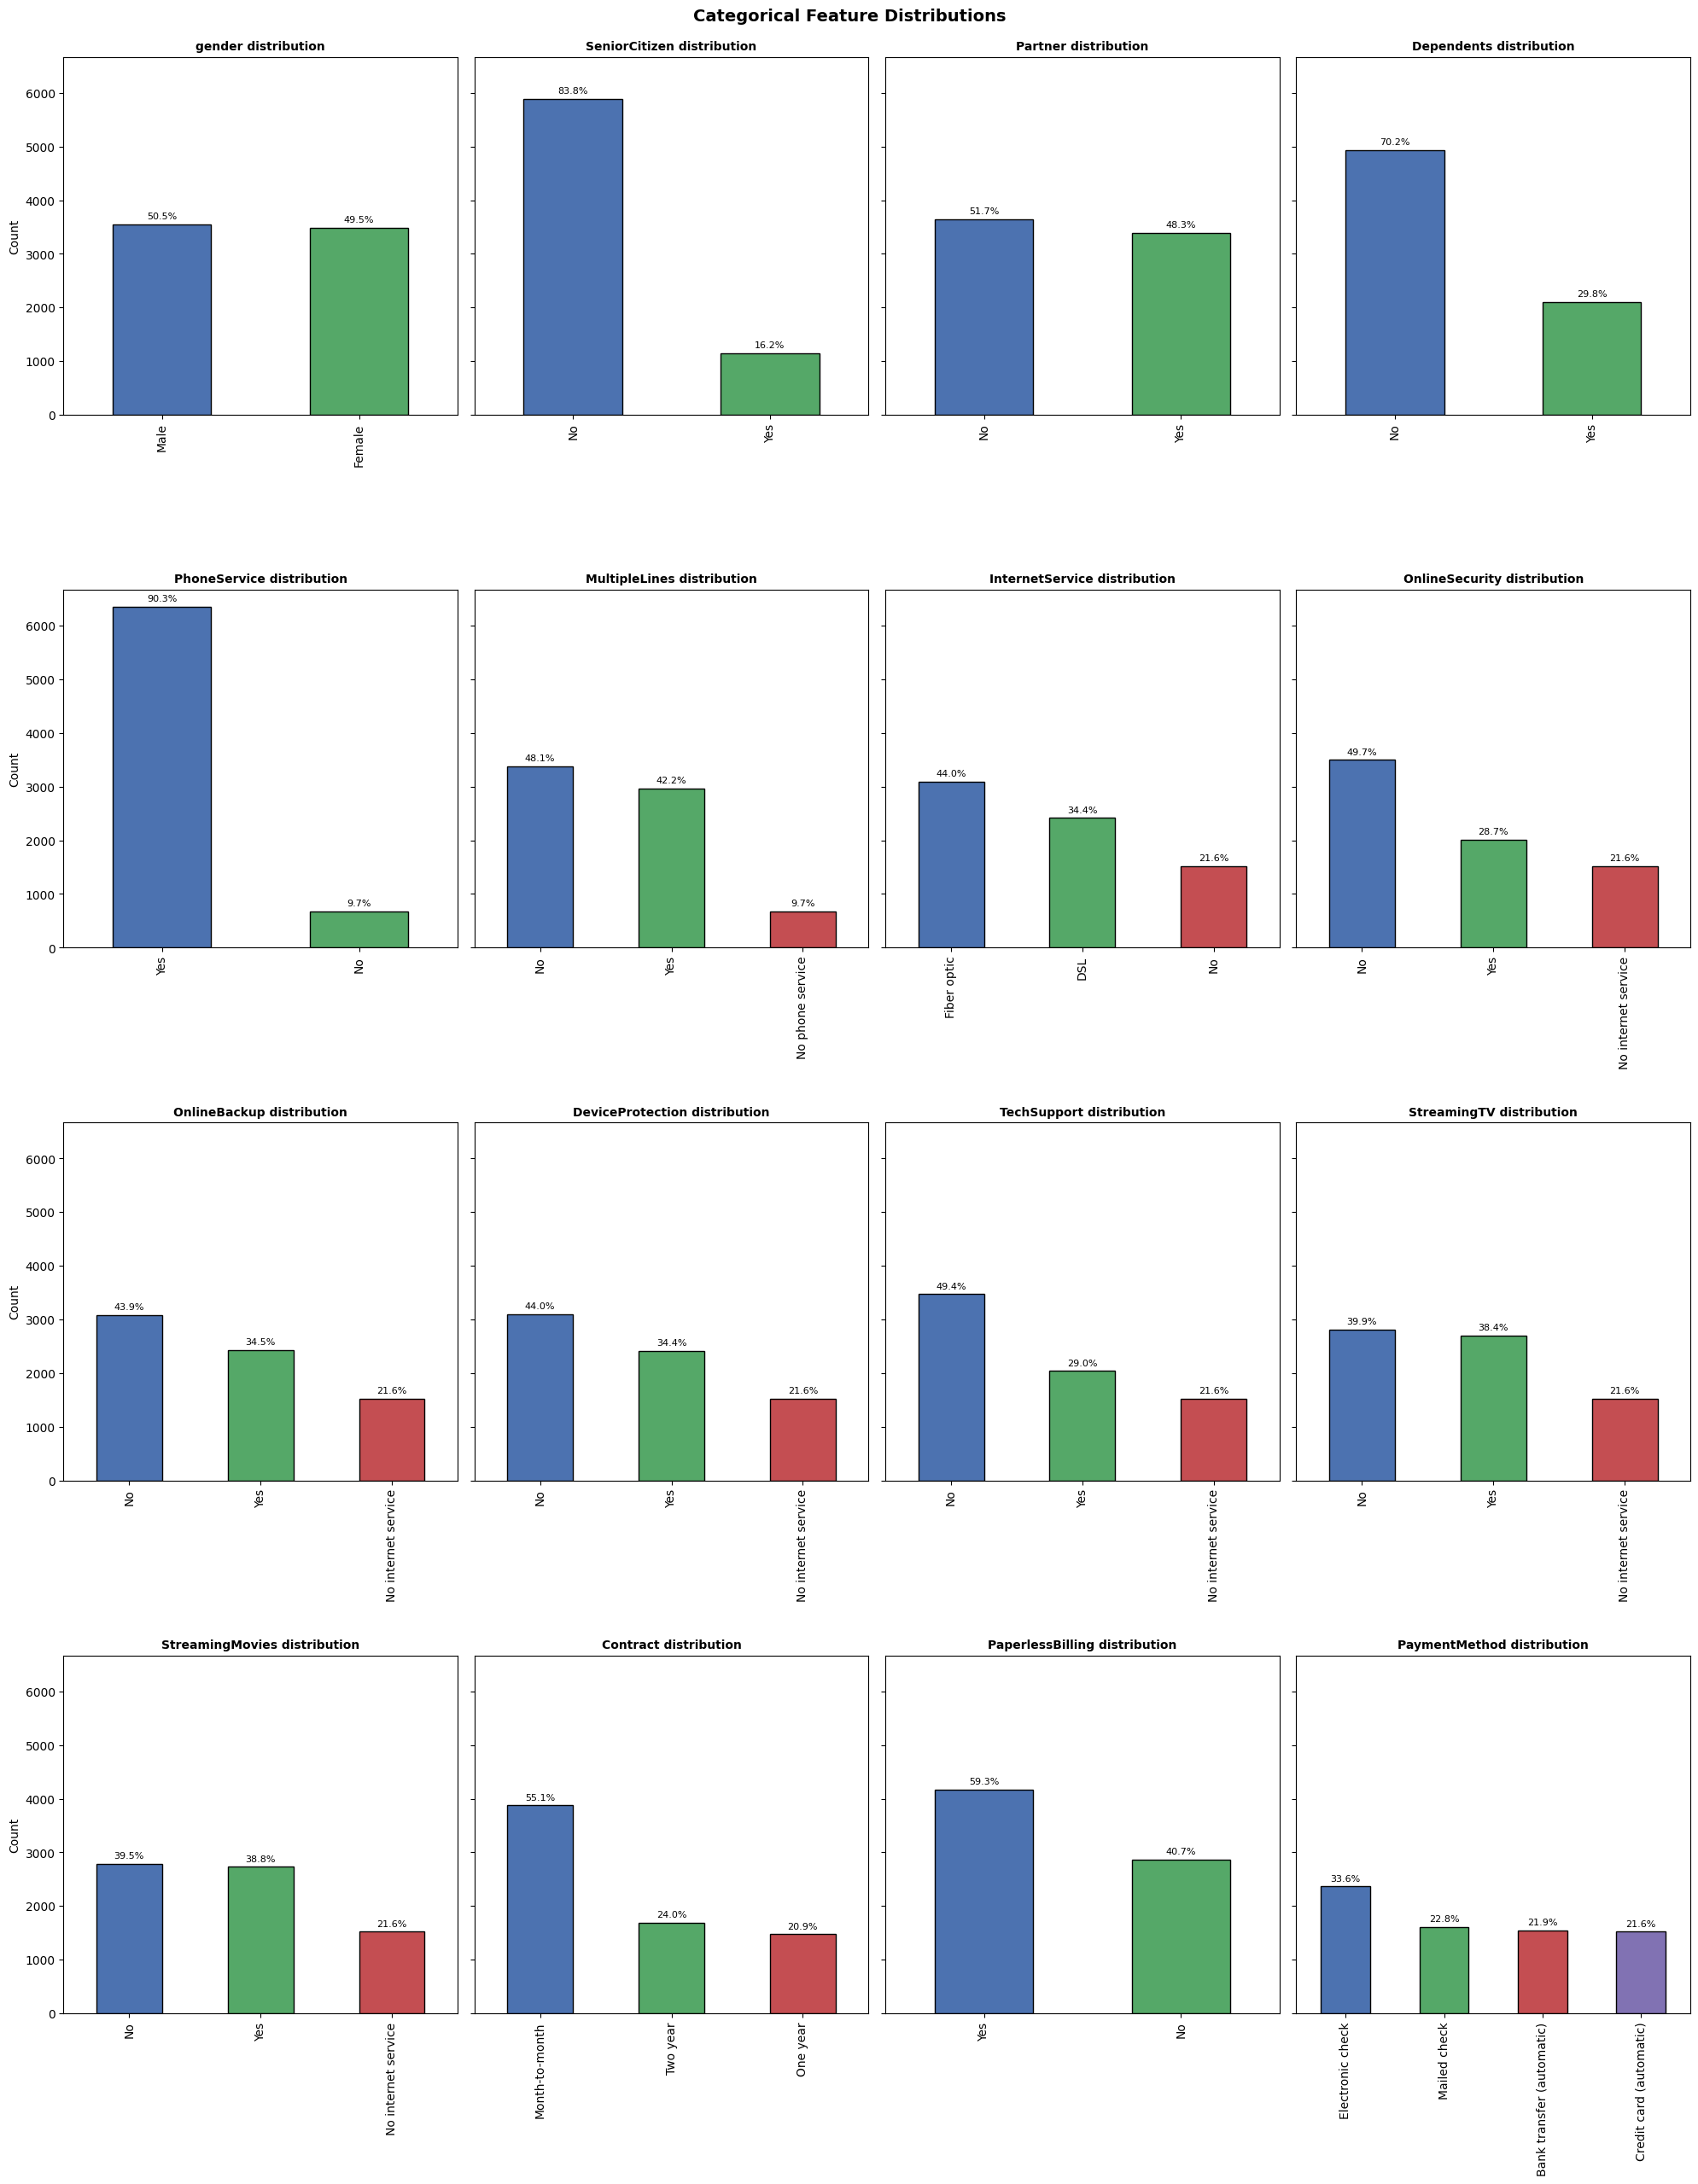

In [ ]:
titles = ['gender distribution', 'SeniorCitizen distribution', 'Partner distribution', 'Dependents distribution',
          'PhoneService distribution','MultipleLines distribution', 'InternetService distribution',
          'OnlineSecurity distribution', 'OnlineBackup distribution','DeviceProtection distribution',
          'TechSupport distribution', 'StreamingTV distribution', 'StreamingMovies distribution',
       'Contract distribution', 'PaperlessBilling distribution', 'PaymentMethod distribution', 'Churn distribution']
cat_df = cat_cols.to_series() # turn index into series
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3"]
fig, axes = plt.subplots(5, 4, figsize = (20,30), sharey = True)
axes = axes.flatten() # turn 2x2 into a 1D List
for column, ax, title in zip(cat_df, axes, titles):
      counts = df[column].value_counts(dropna=False)
      counts.plot(kind = 'bar',ax = ax, color = colors, edgecolor = 'black')
      ax.set_title(title, fontsize = 10, fontweight = 'bold')
      ax.set_xlabel("")
      ax.set_ylabel("Count")
      total = counts.sum()
      #Show the percentage on top of the bars
      for container in ax.containers:
        for rect in container:
            height = rect.get_height()
            pct = (height / total) * 100
            ax.text(rect.get_x() + rect.get_width()/2.,
                   height + total*0.01,
                   f'{pct:.1f}%',
                   ha='center', va='bottom', fontsize=8)

for ax in axes[16:]:
    ax.set_visible(False)
fig.suptitle("Categorical Feature Distributions", fontsize=14, fontweight="bold",y=0.99,va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
# Defining the function to call Seaborn Dist plot
def distplot(feature, frame, color='b'):
    plt.figure(figsize=(6,4))
    plt.title("Distribution for {}".format(feature))
    ax = sns.histplot(frame[feature], color= color, kde=True)
    plt.show()  # FIXED 2: Display plot
    plt.tight_layout()

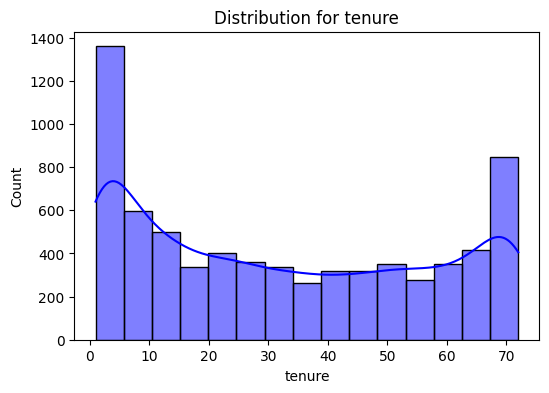

<Figure size 640x480 with 0 Axes>

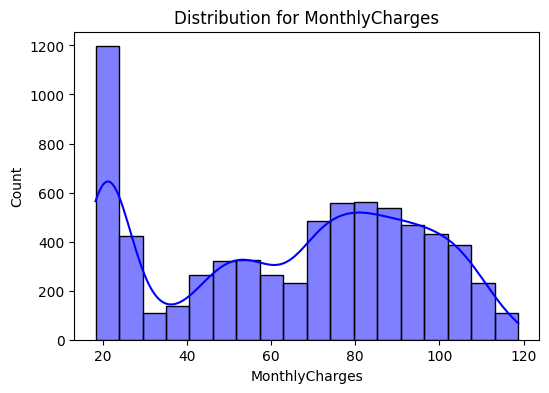

<Figure size 640x480 with 0 Axes>

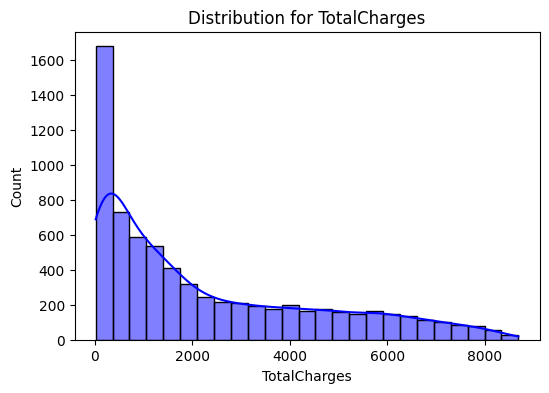

<Figure size 640x480 with 0 Axes>

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [ ]:
df["SeniorCitizen"]

,SeniorCitizen
0,No
1,No
2,No
3,No
4,No
...,...
7038,No
7039,No
7040,No
7041,Yes


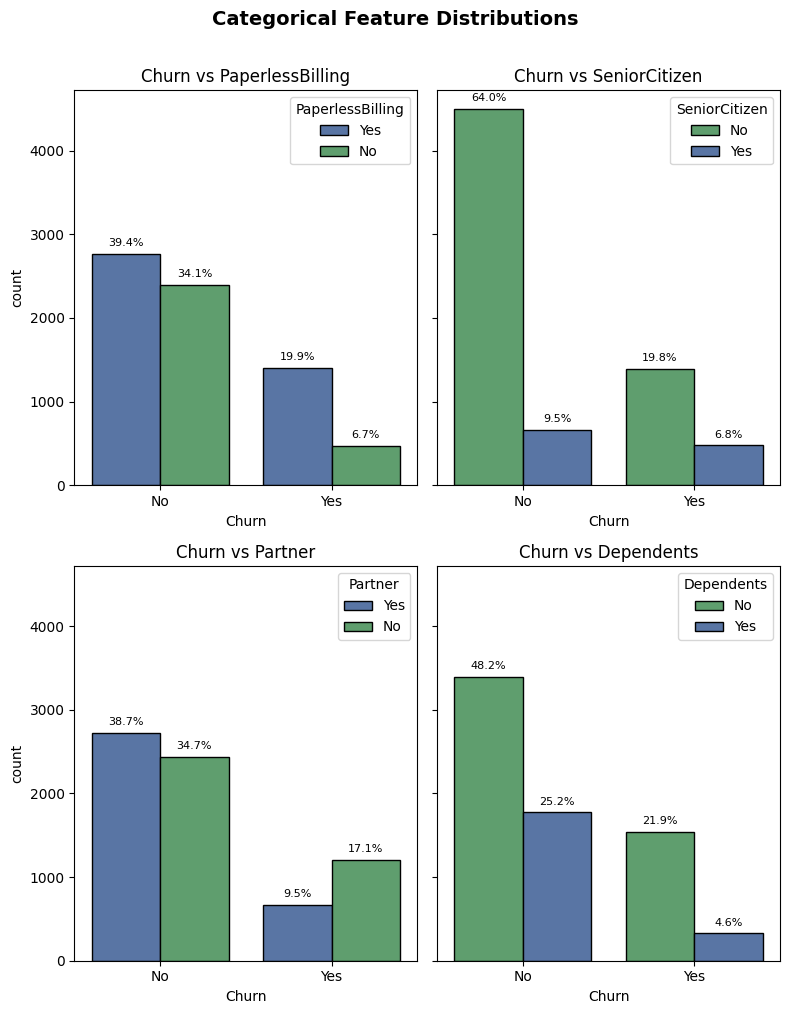

In [ ]:
color_map = {'Yes': "#4C72B0", 'No': "#55A868"}
cat_features = ['PaperlessBilling', 'SeniorCitizen','Partner', 'Dependents']
fig, axes = plt.subplots(2, 2, figsize=(8, 10), sharey=True)
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    ax = axes[i]
    total = len(df)  # Global total for consistent % across all plots

    sns.countplot(data=df, x="Churn", hue=feature, ax=ax, palette=color_map,
                  edgecolor = 'black')
    ax.set_title(f"Churn vs {feature}")

    # Add percentage labels (your exact style)
    for container in ax.containers:
        for rect in container:
            height = rect.get_height()
            pct = (height / total) * 100
            ax.text(rect.get_x() + rect.get_width()/2.,
                   height + total*0.01,
                   f'{pct:.1f}%',
                   ha='center', va='bottom', fontsize=8)

fig.suptitle("Categorical Feature Distributions", fontsize=14, fontweight="bold",y=0.99,va='bottom')
plt.tight_layout()
plt.show()


### Performing Label Encoding for the categorical features
*Label Encoding is a data preprocessing technique in Machine Learning used to convert categorical values into numerical labels. Since most ML algorithms work only with numeric data, categorical features must be encoded before model training. In Label Encoding, each unique category is assigned an integer between 0 and the number of classes.*

In [ ]:
from sklearn import preprocessing
# performing label encoding:
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes =='object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Check the new df with label encoding
print(df.head(5))
df.info()

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

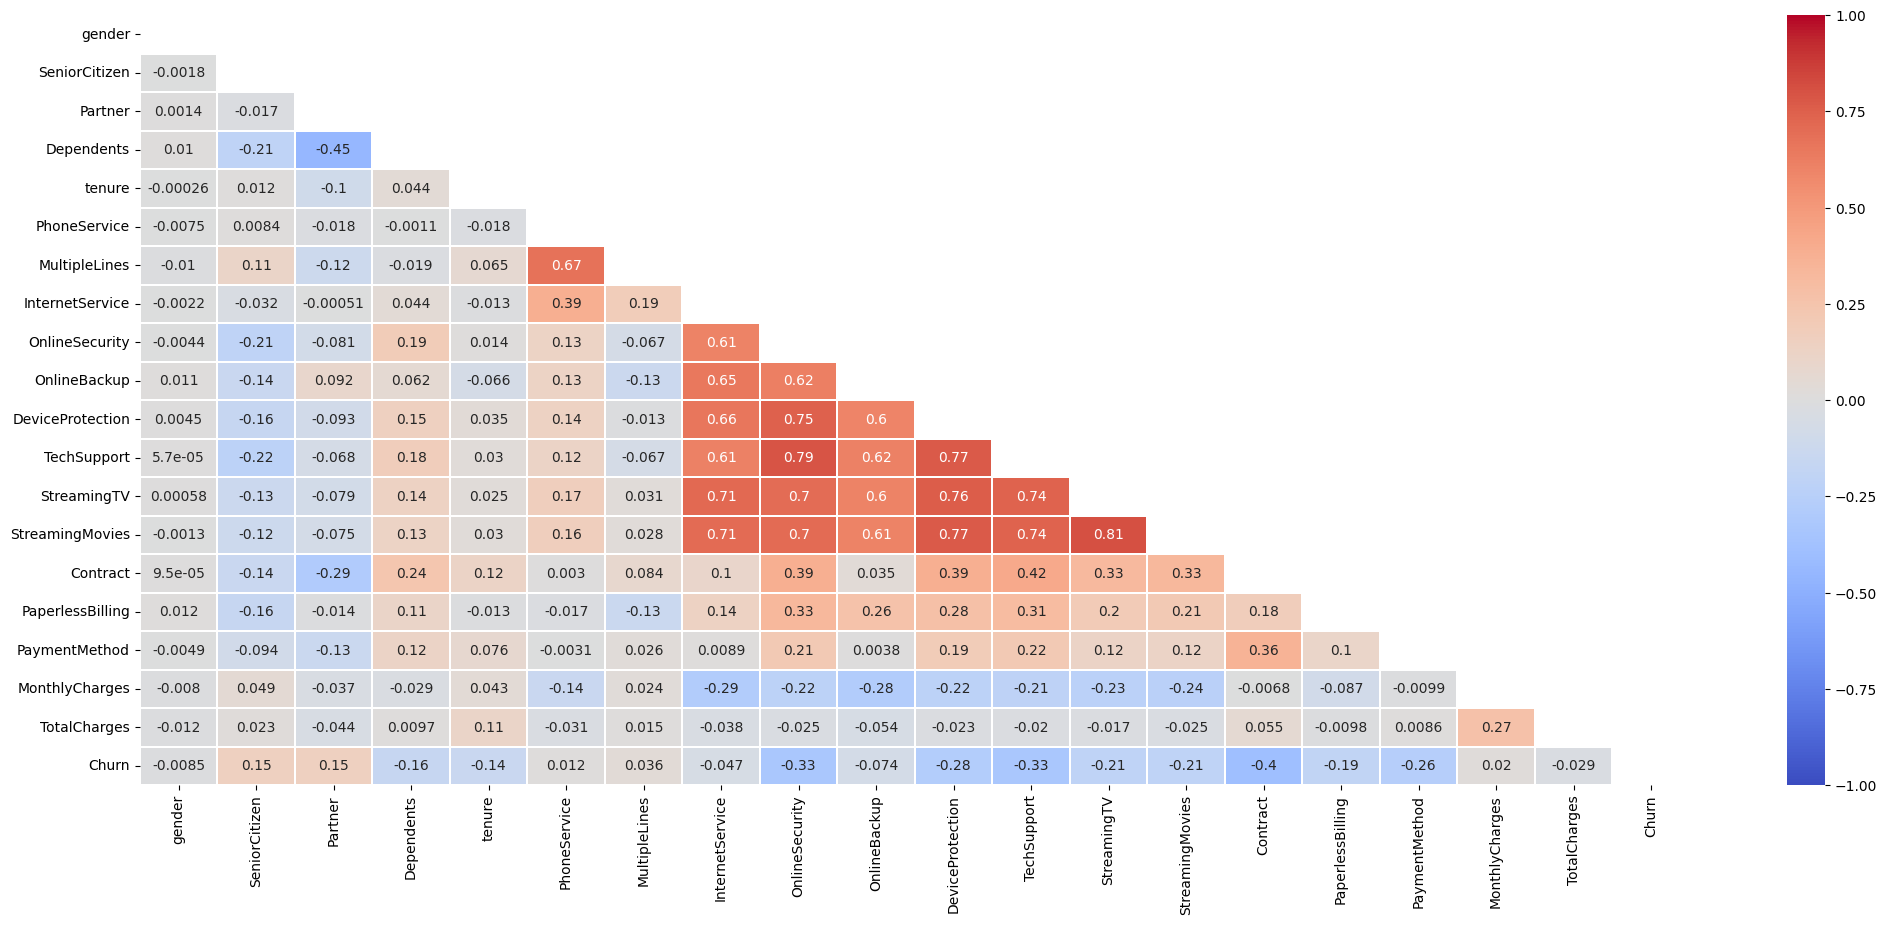

In [ ]:
# Visualizing the correlation between features
plt.figure(figsize = (25,10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

###Step 3: Performing predictive Machine Learning
This is a classification model, where the target is churn (to predict the churn possibility). I will use Random forest, XGBoost, and logistic regression.

In [ ]:
# Step 3.1: splitting the data into feature and target:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']
# Step 3.2: splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((4922, 19), (2110, 19), (4922,), (2110,))

In [ ]:
# Performing ML algorithms : RandomForest (rf), XGBoost (xgb), Logistic regression (lr)

rf = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)

xgb = XGBClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.1, random_state = 7)


lr = LogisticRegression(max_iter=10000, random_state = 7)

# fitting the models & making predictions on the train_set:
for clf in (rf, xgb, lr):
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_train)
  print("Accuracy score of ",
          clf.__class__.__name__,
          "=", 100 * metrics.accuracy_score(Y_train, y_pred))
  # Test accuracy (what matters!)
  Y_test_pred = clf.predict(X_test)  # assuming you have X_test, Y_test
  print(f"Test accuracy {clf.__class__.__name__}: {100*metrics.accuracy_score(Y_test, Y_test_pred):.1f}%")

Accuracy score of  RandomForestClassifier = 97.88703778951646
Test accuracy RandomForestClassifier: 77.1%
Accuracy score of  XGBClassifier = 82.54774481917919
Test accuracy XGBClassifier: 80.0%
Accuracy score of  LogisticRegression = 80.55668427468508
Test accuracy LogisticRegression: 80.1%


Model              | Train | Test | Gap
-------------------|-------|------|----
RandomForest       | 97.8% | 77.1%| **20.9%** ← Heavy overfitting
XGBoost            | 82.2% | 80.0%| **2.2%**  ← slight overfitting
LogisticRegression | 80.5% | 80.1&| **0.4%**  ← Good generalization

Choosing XGBoost and Logistic regression for better learning pattern (lower overfitting)

Next step is to tune the XGB with cross-Validation.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
X_temp, X_val, y_temp, y_val = train_test_split(X_train, Y_train, test_size=0.2,
                                                stratify=Y_train, random_state=7)

param_dist = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.1, 0.3, 0.5],
    'reg_lambda': [0.5, 1, 1.5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(random_state=7, eval_metric='aucpr'),
    param_distributions=param_dist,
    n_iter=50,           # 50 random combos
    cv=5,                # Stratified KFold
    scoring='roc_auc',   # FS priority metric
    random_state=7,
    n_jobs=-1
)

xgb_search.fit(X_train, Y_train)
print(f"Best params: {xgb_search.best_params_}")
print(f"CV AUC: {xgb_search.best_score_:.3f}")

Best params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
CV AUC: 0.848


In [ ]:
final_xgb = XGBClassifier(
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.1,
    n_estimators=300,
    max_depth=4,
    learning_rate=0.01,
    colsample_bytree=0.8,
    random_state=7,
    eval_metric='aucpr'  # FS churn metric
)

final_xgb.fit(X_train, Y_train)
y_pred = final_xgb.predict(X_train)
print("Accuracy score of ",
        final_xgb.__class__.__name__,
        "=", 100 * metrics.accuracy_score(Y_train, y_pred))
# Test accuracy (what matters!)
Y_test_pred = final_xgb.predict(X_test)  # assuming you have X_test, Y_test
print(f"Test accuracy {final_xgb.__class__.__name__}: {100*metrics.accuracy_score(Y_test, Y_test_pred):.1f}%")

Accuracy score of  XGBClassifier = 82.08045509955303
Test accuracy XGBClassifier: 79.8%


In [ ]:
from sklearn.model_selection import train_test_split

# Split for validation set
X_temp, X_val, y_temp, y_val = train_test_split(X_train, Y_train, test_size=0.3,
                                                stratify=Y_train, random_state=7)

# Constructor: NO early_stopping_rounds here
xgb_early = XGBClassifier(
    n_estimators=1000,        # MAX trees
    max_depth=8,
    learning_rate=0.02,
    reg_alpha=0.01,
    reg_lambda=0.1,
    subsample=0.5,
    colsample_bytree=0.8,
    scale_pos_weight=0.8,     # Churn imbalance
    early_stopping_rounds=20,
    random_state=7
)

# .fit(): early_stopping_rounds goes HERE
xgb_early.fit(
    X_temp, y_temp,
    eval_set=[(X_val, y_val)],           # REQUIRED for early stopping
    verbose=True                         # Watch it stop
)

print(f"Best iteration: {xgb_early.best_iteration} trees used")
print(f"Train acc: {accuracy_score(Y_train, xgb_early.predict(X_train)):.1%}")
print(f"Test acc:  {accuracy_score(Y_test, xgb_early.predict(X_test)):.1%}")


[0]	validation_0-logloss:0.57449
[1]	validation_0-logloss:0.56894
[2]	validation_0-logloss:0.56337
[3]	validation_0-logloss:0.55790
[4]	validation_0-logloss:0.55278
[5]	validation_0-logloss:0.54780
[6]	validation_0-logloss:0.54339
[7]	validation_0-logloss:0.53881
[8]	validation_0-logloss:0.53489
[9]	validation_0-logloss:0.53116
[10]	validation_0-logloss:0.52787
[11]	validation_0-logloss:0.52411
[12]	validation_0-logloss:0.52078
[13]	validation_0-logloss:0.51739
[14]	validation_0-logloss:0.51388
[15]	validation_0-logloss:0.51035
[16]	validation_0-logloss:0.50743
[17]	validation_0-logloss:0.50466
[18]	validation_0-logloss:0.50206
[19]	validation_0-logloss:0.49913
[20]	validation_0-logloss:0.49625
[21]	validation_0-logloss:0.49385
[22]	validation_0-logloss:0.49126
[23]	validation_0-logloss:0.48897
[24]	validation_0-logloss:0.48640
[25]	validation_0-logloss:0.48402
[26]	validation_0-logloss:0.48194
[27]	validation_0-logloss:0.47967
[28]	validation_0-logloss:0.47771
[29]	validation_0-loglos